# Run SCENIC+

In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "L5_ET")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L5_ET/figures/")

## Some plots

In [2]:
import mudata
scplus_mdata = mudata.read("scplus_outputs/scplusmdata.h5mu")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be remo

In [3]:
scplus_mdata

MuData object with n_obs × n_vars = 3772 × 561140
  uns:	'direct_e_regulon_metadata', 'extended_e_regulon_metadata'
  6 modalities
    scRNA_counts:	3772 x 32876
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'Major_Class', 'PatientID', 'Region', 'Subclass_F', 'Cell_type'
      obsm:	'X_pca', 'X_umap'
    scATAC_counts:	3772 x 528134
      obs:	'cisTopic_log_nr_acc', 'cisTopic_nr_acc', 'cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'Major_Class', 'PatientID', 'Region', 'Subclass_F', 'Cell_type', 'sample_id', 'pycisTopic_leiden_20_0.2', 'pycisTopic_leiden_20_0.4', 'pycisTopic_leiden_20_0.6', 'pycisTopic_leiden_20_0.8', 'pycisTopic_leiden_20_1.0'
      var:	'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
      obsm:	'UMAP'
    direct_gene_based_AUC:	3772 x 36
    direct_region_based_AUC:	3772 x 36
    extended_gene_based_AUC:	3772 x 29
    extended_region_based_AUC:	3772 x 29

In [4]:
import numpy as np
scplus_mdata.obs["scRNA_counts:Region_Split"] = np.where(
    scplus_mdata.obs["scRNA_counts:Region"].isin(["A24", "A9", "FI", "M1C", "S1C"]), "Rostral",
    np.where(
        scplus_mdata.obs["scRNA_counts:Region"].isin(["MTG", "A1C", "AnG", "V1C"]), "Caudal", "Unknown"
    )
)

In [5]:
from scenicplus.RSS import (regulon_specificity_scores, plot_rss)

In [6]:
rss = regulon_specificity_scores(
    scplus_mudata=scplus_mdata,
    variable="scRNA_counts:Cell_type",
    modalities=["direct_gene_based_AUC", "extended_gene_based_AUC"]
)

In [7]:
import seaborn as sns
sns.set_context(font_scale=1.5)

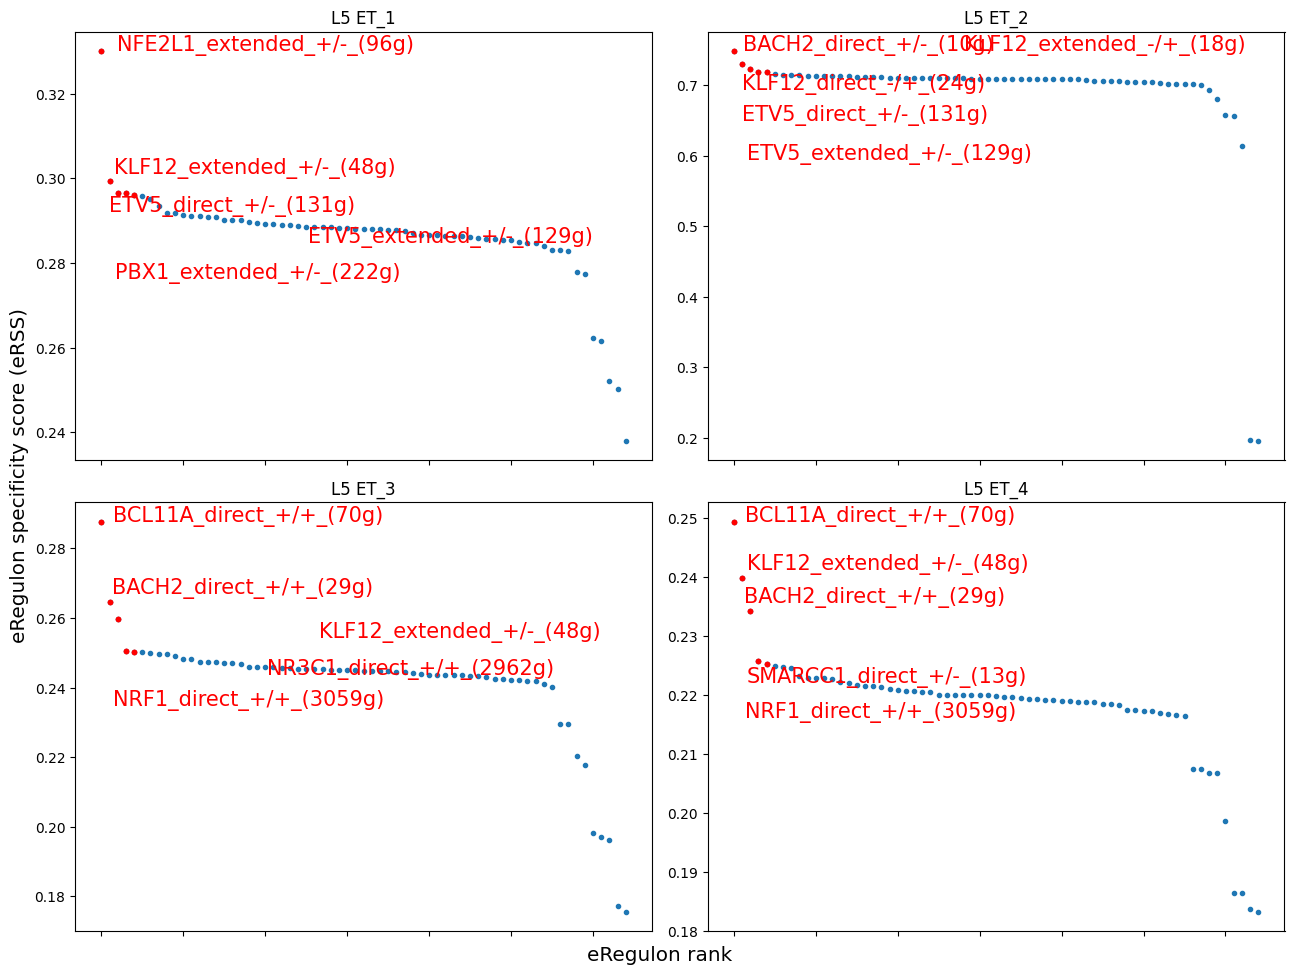

In [8]:
plot_rss(data_matrix=rss, top_n=5, num_columns=2, fontsize=15)

In [9]:
rss = regulon_specificity_scores(
    scplus_mudata=scplus_mdata,
    variable="scRNA_counts:Region",
    modalities=["direct_gene_based_AUC", "extended_gene_based_AUC"]
)

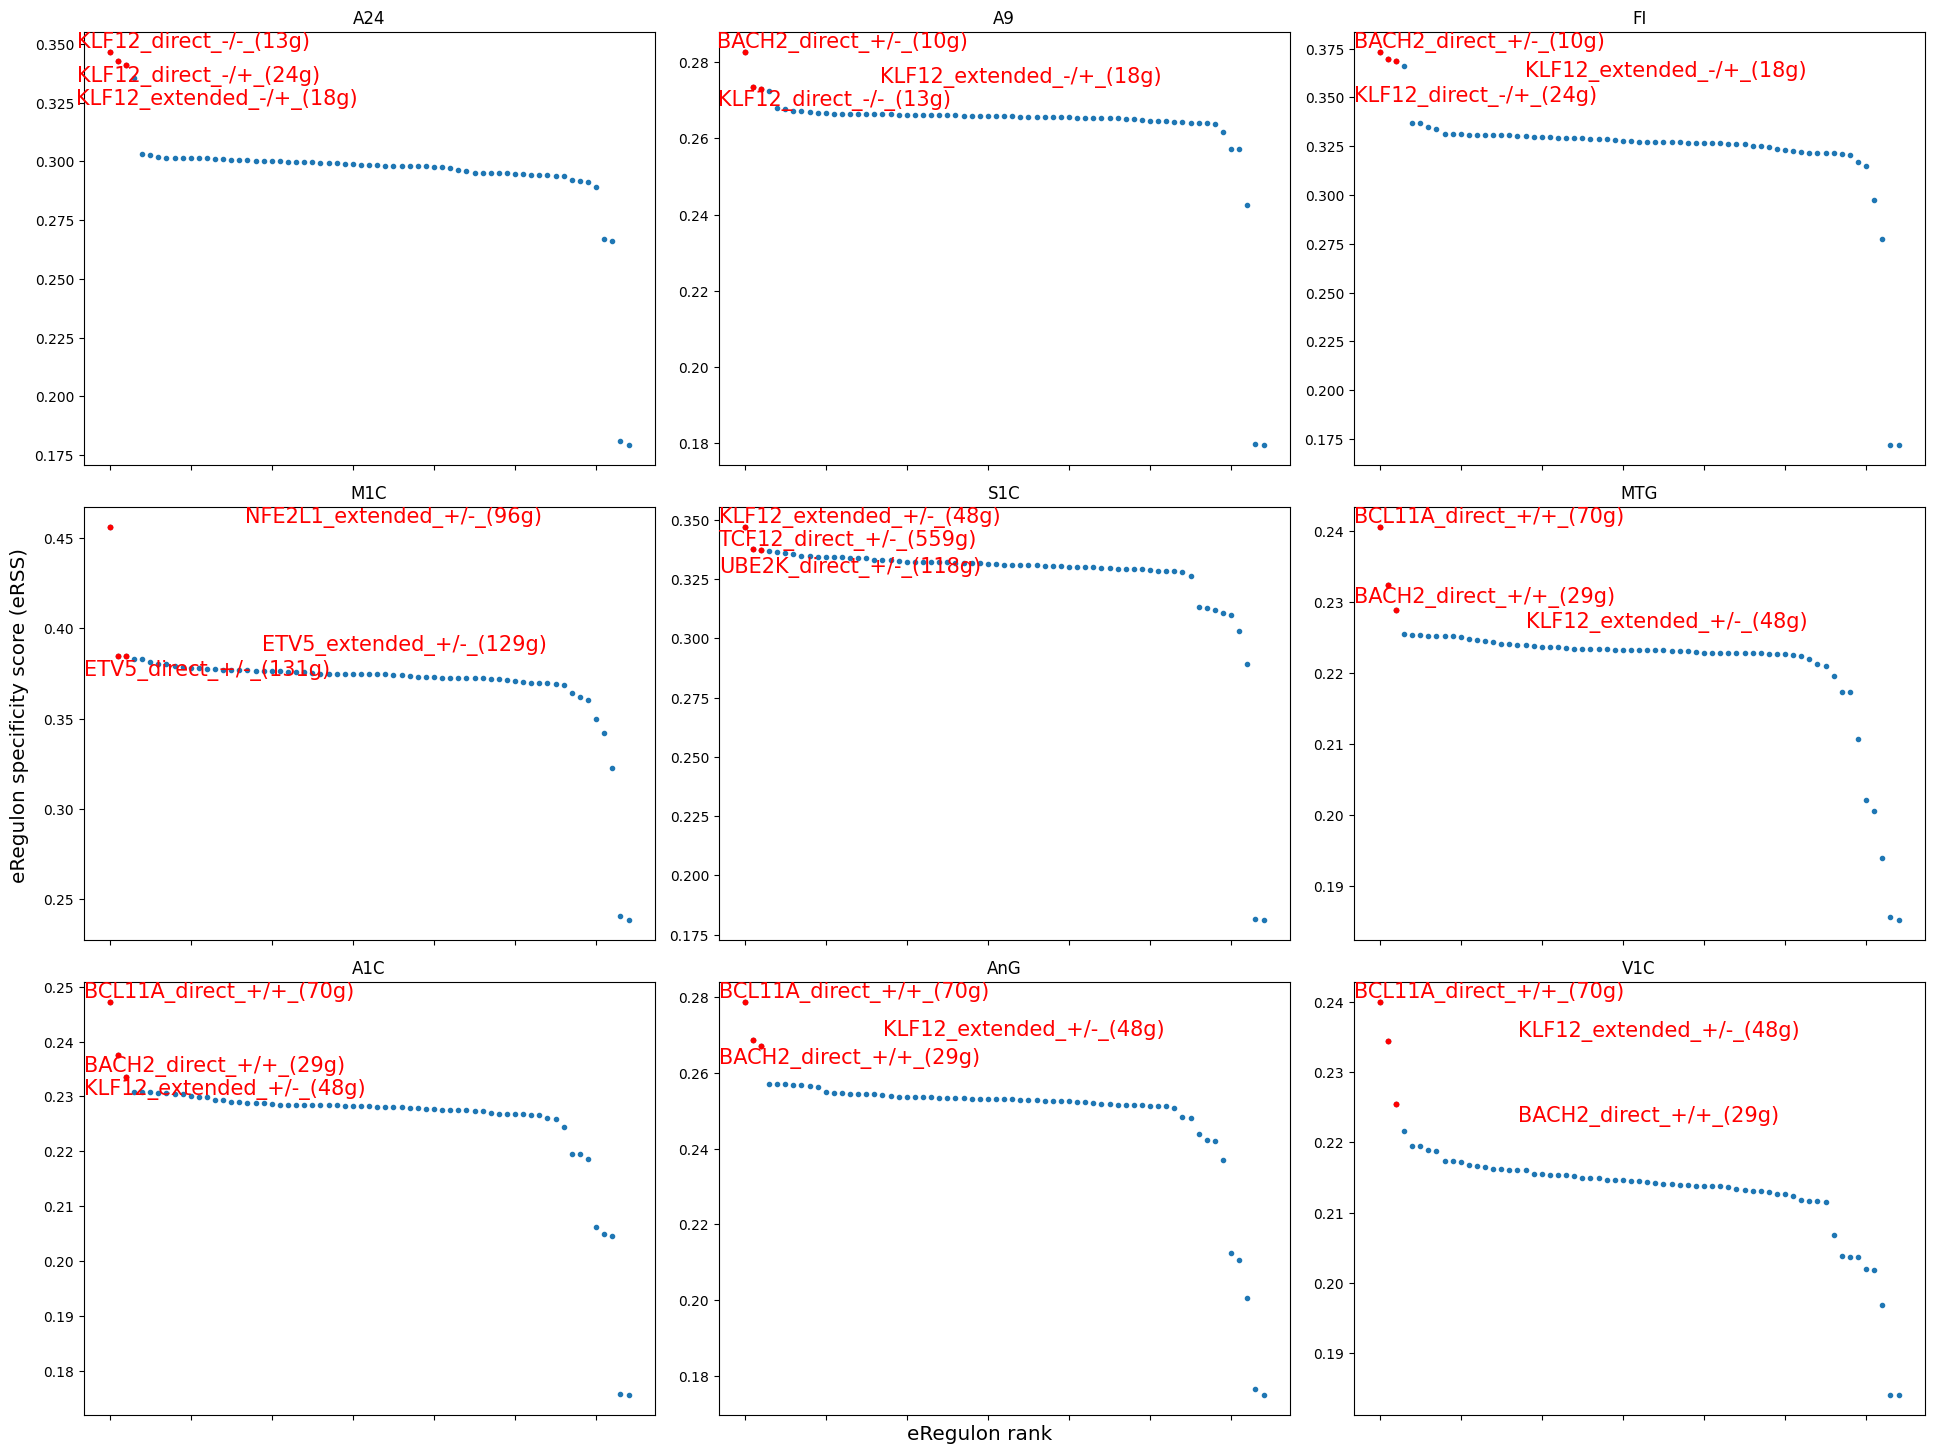

In [11]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
plot_rss(
    data_matrix=rss, top_n=3, num_columns=3, fontsize=15,
    selected_groups=region_align,
    save=plot_dir / "L5_ET_rss_brain_regions.png"
)

In [12]:
rss = regulon_specificity_scores(
    scplus_mudata=scplus_mdata,
    variable="scRNA_counts:Region_Split",
    modalities=["direct_gene_based_AUC", "extended_gene_based_AUC"]
)

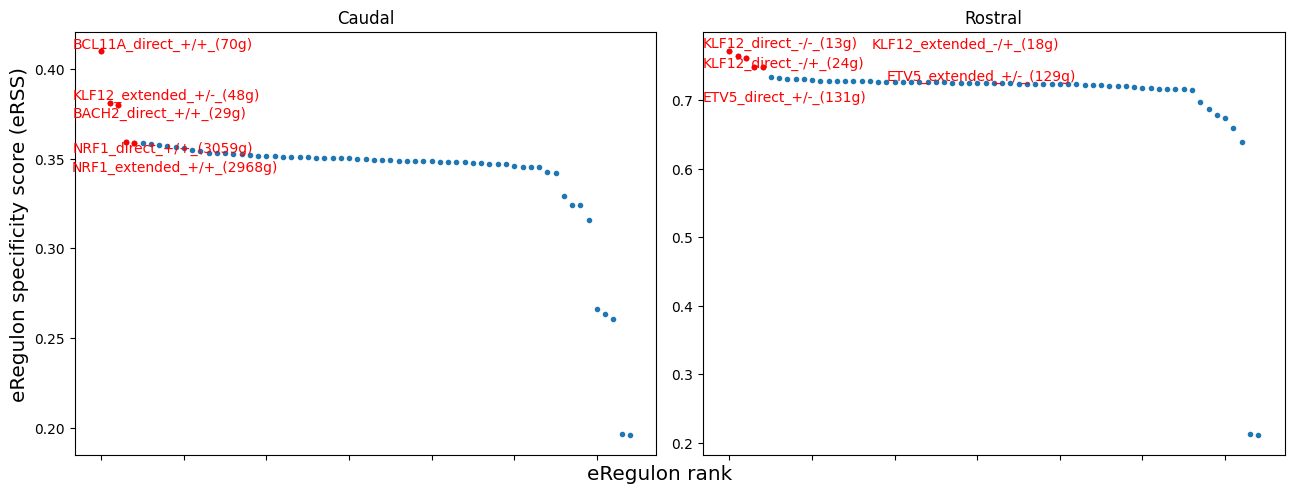

In [13]:
plot_rss(
    data_matrix=rss, top_n=5, num_columns=2, fontsize=10,
    save=plot_dir / "L5_ET_rss_rostral_caudal.png"
)

In [14]:
rss["KLF12_direct_-/+_(24g)"]

Rostral    0.761520
Caudal     0.263397
Name: KLF12_direct_-/+_(24g), dtype: float64

In [15]:
rss["KLF12_extended_+/-_(48g)"]

Rostral    0.673718
Caudal     0.381369
Name: KLF12_extended_+/-_(48g), dtype: float64

In [16]:
import scanpy as sc
import anndata
eRegulon_gene_AUC = anndata.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"]],
    axis=1,
)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


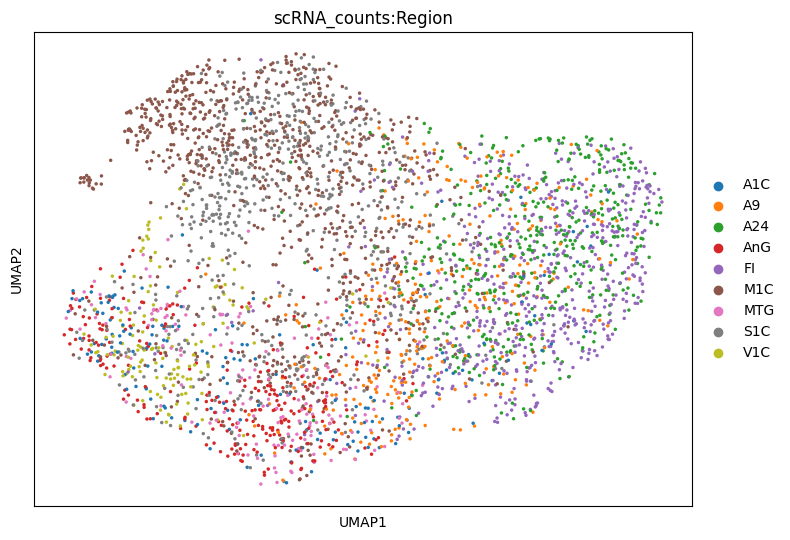

In [18]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]
sc.pp.neighbors(eRegulon_gene_AUC, use_rep="X")
sc.tl.umap(eRegulon_gene_AUC)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(5.5)
sc.pl.umap(eRegulon_gene_AUC, color="scRNA_counts:Region", size=25, ax=ax)
fig.savefig(plot_dir / "L5_ET_brain_region_umap.png", dpi=300, format="png")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


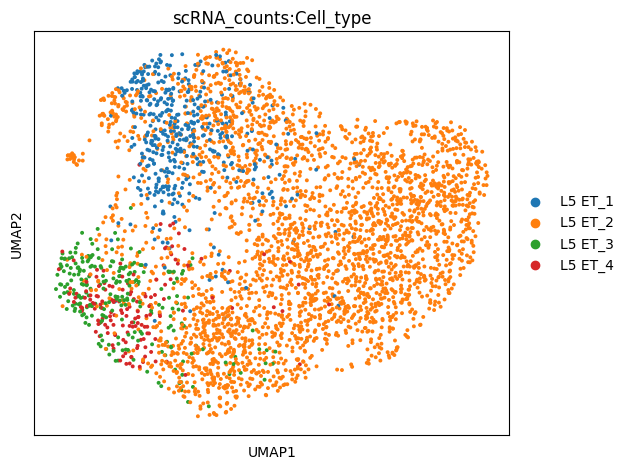

In [19]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]
sc.pp.neighbors(eRegulon_gene_AUC, use_rep="X")
sc.tl.umap(eRegulon_gene_AUC)
sc.pl.umap(eRegulon_gene_AUC, color="scRNA_counts:Cell_type")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


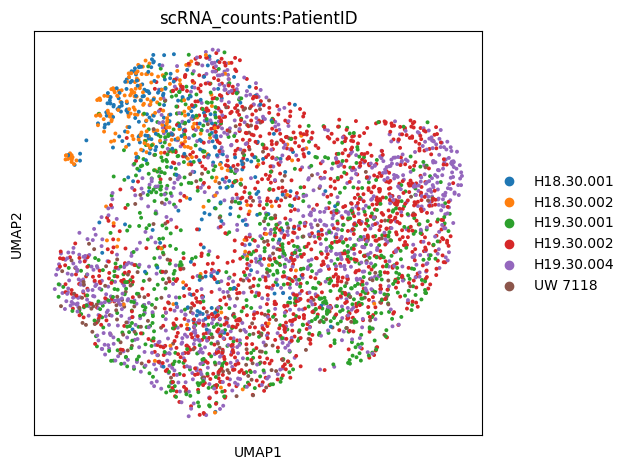

In [20]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]
sc.pp.neighbors(eRegulon_gene_AUC, use_rep="X")
sc.tl.umap(eRegulon_gene_AUC)
sc.pl.umap(eRegulon_gene_AUC, color="scRNA_counts:PatientID")

In [21]:
plot_data = scplus_mdata["scRNA_counts"].obs.loc[:, ["Region", "Cell_type"]]
plot_data = plot_data.groupby(["Cell_type", "Region"]).size().reset_index()
plot_data.columns = ["Cell_type", "Region", "Count"]
plot_data["Percentage"] = plot_data.groupby("Region", group_keys=False)["Count"].apply(lambda x: x / x.sum())

In [22]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
plot_data["Region"] = pd.Categorical(plot_data["Region"], categories=region_align)

<AxesSubplot: xlabel='Region', ylabel='Percentage'>

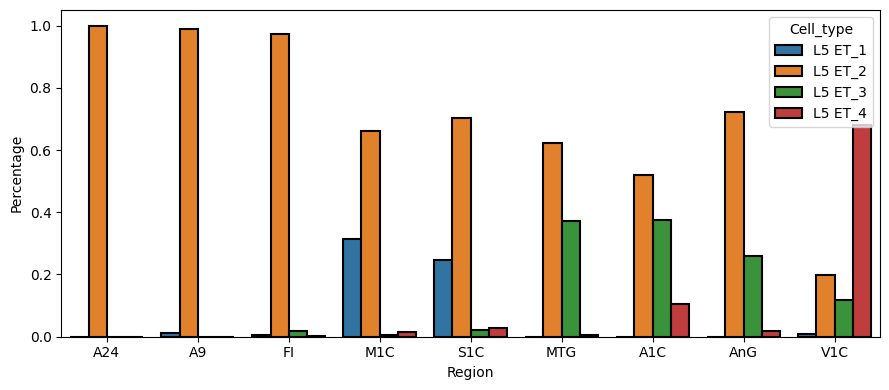

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(9)
fig.set_figheight(4)
sns.barplot(
    plot_data, x="Region", y="Percentage", hue="Cell_type", ax=ax, linewidth=1.5, edgecolor="black")

In [24]:
plot_data = scplus_mdata["scRNA_counts"].obs.loc[:, ["PatientID", "Region"]]
plot_data = plot_data.groupby(["Region", "PatientID"]).size().reset_index()
plot_data.columns = ["Region", "PatientID", "Count"]
plot_data["Percentage"] = plot_data.groupby("PatientID", group_keys=False)["Count"].apply(lambda x: x / x.sum())
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
plot_data["Region"] = pd.Categorical(plot_data["Region"], categories=region_align)

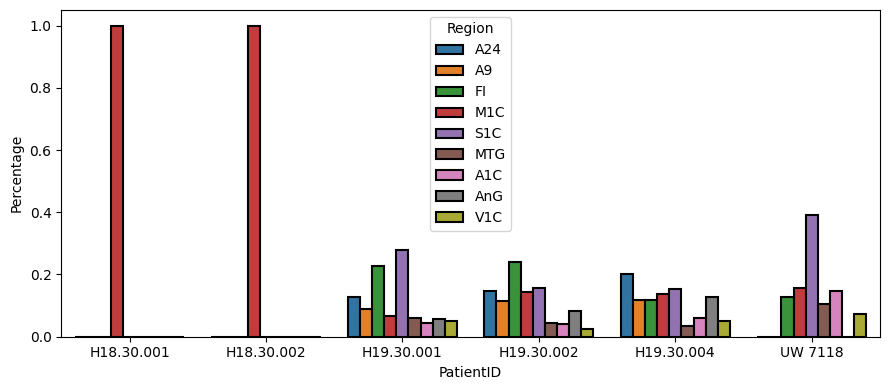

In [26]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(9)
fig.set_figheight(4)
sns.barplot(
    plot_data, x="PatientID", y="Percentage", hue="Region", ax=ax, linewidth=1.5, edgecolor="black")
fig.savefig(plot_dir / "L5_ET_donor_region_proportions.png", dpi=300, format="png")

## Module scores

In [2]:
import pandas as pd
import scanpy as sc
import decoupler as dc
import numpy as np

In [3]:
eregulon_metadata = pd.read_csv(
    "scplus_outputs/eRegulon_direct.tsv",
    header=0, sep="\t"
)

from collections import defaultdict
eregulon_modules = dict()
for name, subdf in eregulon_metadata.groupby("eRegulon_name"):
    eregulon_modules[name] = set(subdf["Gene"])
    eregulon_modules[name].add(subdf.iloc[0]["TF"])

In [4]:
eregulon_metadata = pd.read_csv(
    "scplus_outputs/eRegulons_extended.tsv",
    header=0, sep="\t"
)

for name, subdf in eregulon_metadata.groupby("eRegulon_name"):
    eregulon_modules[name] = set(subdf["Gene"])
    eregulon_modules[name].add(subdf.iloc[0]["TF"])

In [5]:
L5_ET_rna = sc.read_h5ad("L5_ET_rna_matrix.h5ad")

In [6]:
L5_ET_rna_counts = L5_ET_rna.raw.to_adata()
sc.pp.normalize_total(L5_ET_rna_counts, target_sum=1e4)
sc.pp.log1p(L5_ET_rna_counts)

In [7]:
for name in eregulon_modules:
    sc.tl.score_genes(
        adata=L5_ET_rna_counts, 
        gene_list=list(eregulon_modules[name]), 
        score_name=name
    )

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will rai

In [8]:
L5_ET_rna_counts.obs.iloc[:, 10:].to_csv(
    "L5_ET_regulon_module_scores.tsv", header=True, index=True, sep="\t")

## Some plots

In [2]:
import pandas as pd
import scanpy as sc
import decoupler as dc
import numpy as np

In [3]:
L5_ET_rna = sc.read_h5ad("L5_ET_rna_matrix.h5ad")
L5_ET_rna_counts = L5_ET_rna.raw.to_adata()

In [4]:
sc.pp.normalize_total(L5_ET_rna_counts, target_sum=1e4)
sc.pp.log1p(L5_ET_rna_counts)

In [5]:
L5_ET_module_scores = pd.read_csv(
    "L5_ET_regulon_module_scores.tsv",
    header=0, index_col=0, sep="\t"
)

In [6]:
L5_ET_module_scores = L5_ET_module_scores.loc[L5_ET_rna.obs.index, :]
L5_ET_module_scores["Region"] = L5_ET_rna.obs["Region"].copy()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]

In [9]:
def plot_regulon_module_score(regulon_name, filename):
    curr_table = L5_ET_module_scores[[regulon_name, "Region"]].copy()
    curr_table["Region"] = pd.Categorical(curr_table["Region"], categories=region_align)
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(8)
    fig.set_figheight(4)
    sns.violinplot(curr_table, x="Region", y=regulon_name, hue="Region", ax=ax)
    fig.savefig(
        plot_dir / filename,
        dpi=300, format="png"
    )

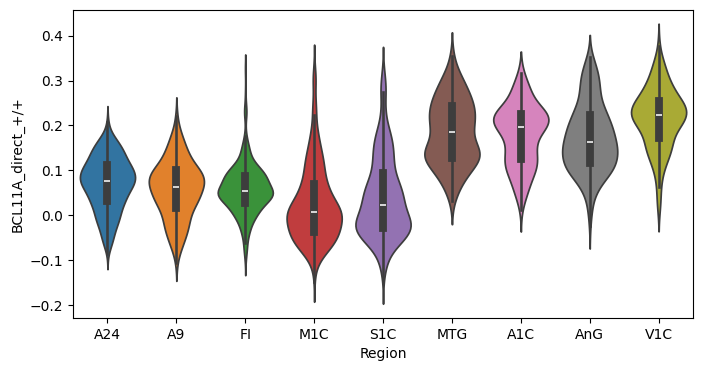

In [10]:
plot_regulon_module_score(
    "BCL11A_direct_+/+", 
    "L5_ET_BCL11A_direct_activator.png"
)

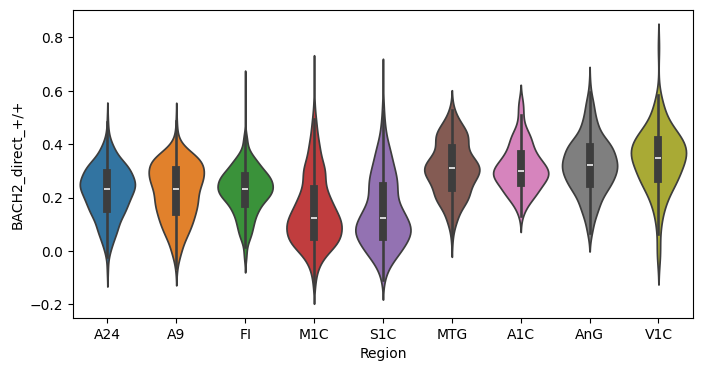

In [11]:
plot_regulon_module_score(
    "BACH2_direct_+/+",
    "L5_ET_BACH2_direct_activator.png"
)

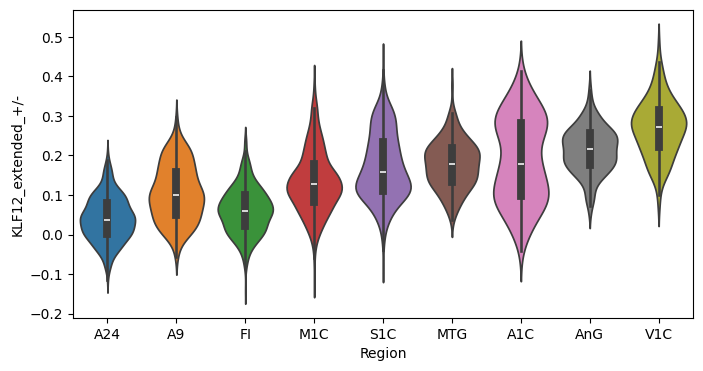

In [12]:
plot_regulon_module_score(
    "KLF12_extended_+/-",
    "L5_ET_KLF12_extended_activator.png"
)

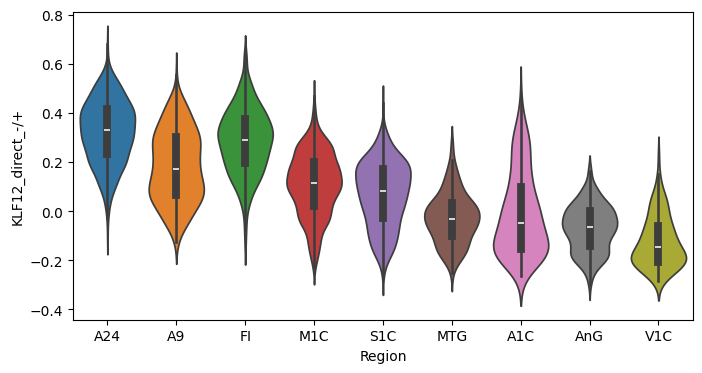

In [13]:
plot_regulon_module_score(
    "KLF12_direct_-/+",
    "L5_ET_KLF12_direct_repressor.png"
)

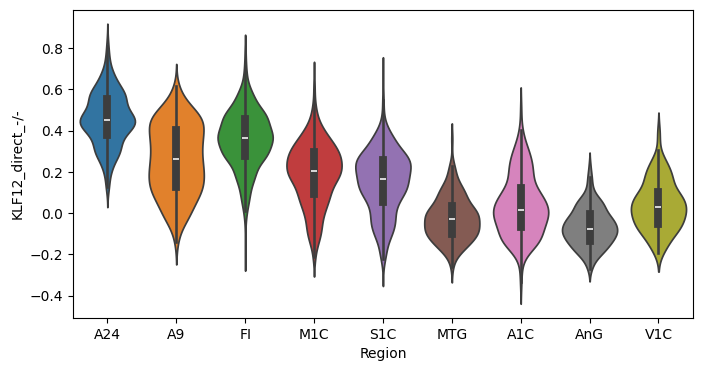

In [14]:
plot_regulon_module_score(
    "KLF12_direct_-/-",
    "L5_ET_KLF12_direct_repressor2.png"
)

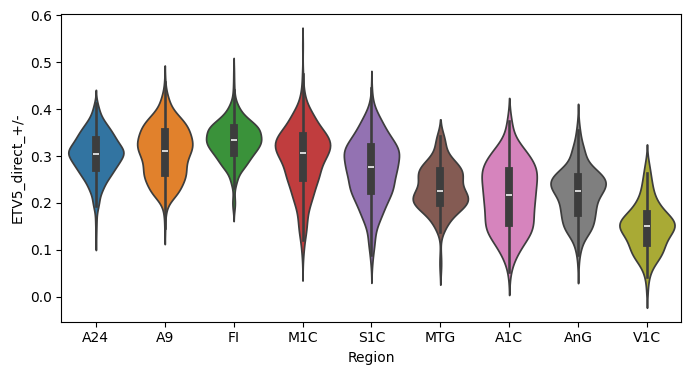

In [15]:
plot_regulon_module_score(
    "ETV5_direct_+/-",
    "L5_ET_ETV5_direct_activator.png"
)

In [16]:
regulon_names = L5_ET_module_scores.iloc[:, 0:-1].columns.to_list()
regulon_tfs = [xx.split("_")[0] for xx in regulon_names]
regulon_unique_tfs = list(set(regulon_tfs))

In [17]:
L5_ET_rna_counts = L5_ET_rna.raw.to_adata()
L5_ET_rna_region_counts = dc.get_pseudobulk(
    adata=L5_ET_rna_counts,
    sample_col="Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=False,
    mode="sum"
)

In [18]:
sc.pp.normalize_total(L5_ET_rna_region_counts, target_sum=1e4)
sc.pp.log1p(L5_ET_rna_region_counts)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [19]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]

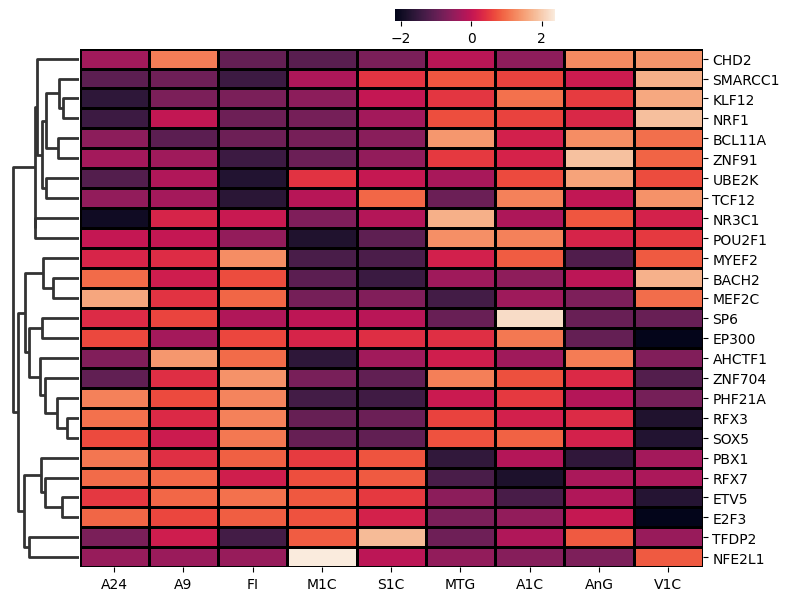

In [20]:
fig = sns.clustermap(
    L5_ET_rna_region_counts[region_align, regulon_unique_tfs].X.T,
    xticklabels=region_align,
    yticklabels=regulon_unique_tfs,
    z_score="row",
    figsize=(8, 6),
    col_cluster=False,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=2,
    linecolor="black",
)
fig.savefig(
    plot_dir / "L5_ET_all_scenic_TFs_RNA.png",
    dpi=300, format="png"
)

In [21]:
# Some individual regulon

In [22]:
regulon_direct_table = pd.read_csv(
    "scplus_outputs/eRegulon_direct.tsv",
    sep="\t", header=0
)
regulon_extended_table = pd.read_csv(
    "scplus_outputs/eRegulons_extended.tsv",
    sep="\t", header=0
)

In [23]:
def plot_target_genes(regulon, regulon_table, figheight, filename):
    curr_table = regulon_table.loc[regulon_table["Gene_signature_name"] == regulon, :]
    if curr_table.shape[0] <= 0:
        return
    target_gene_list = curr_table["Gene"].to_list()
    target_gene_list = list(set(target_gene_list))

    fig = sns.clustermap(
        L5_ET_rna_region_counts[region_align, target_gene_list].X.T,
        xticklabels=region_align,
        yticklabels=target_gene_list,
        z_score="row",
        figsize=(8, figheight),
        col_cluster=False,
        dendrogram_ratio=(0.1, 0.05),
        cbar_pos=(0.5, 0.975, 0.2, 0.02),
        cbar_kws={"orientation": "horizontal"},
        tree_kws={"linewidth": 2},
        linewidth=2,
        linecolor="black",
    )
    fig.savefig(
        plot_dir / filename,
        dpi=300, format="png"
    )

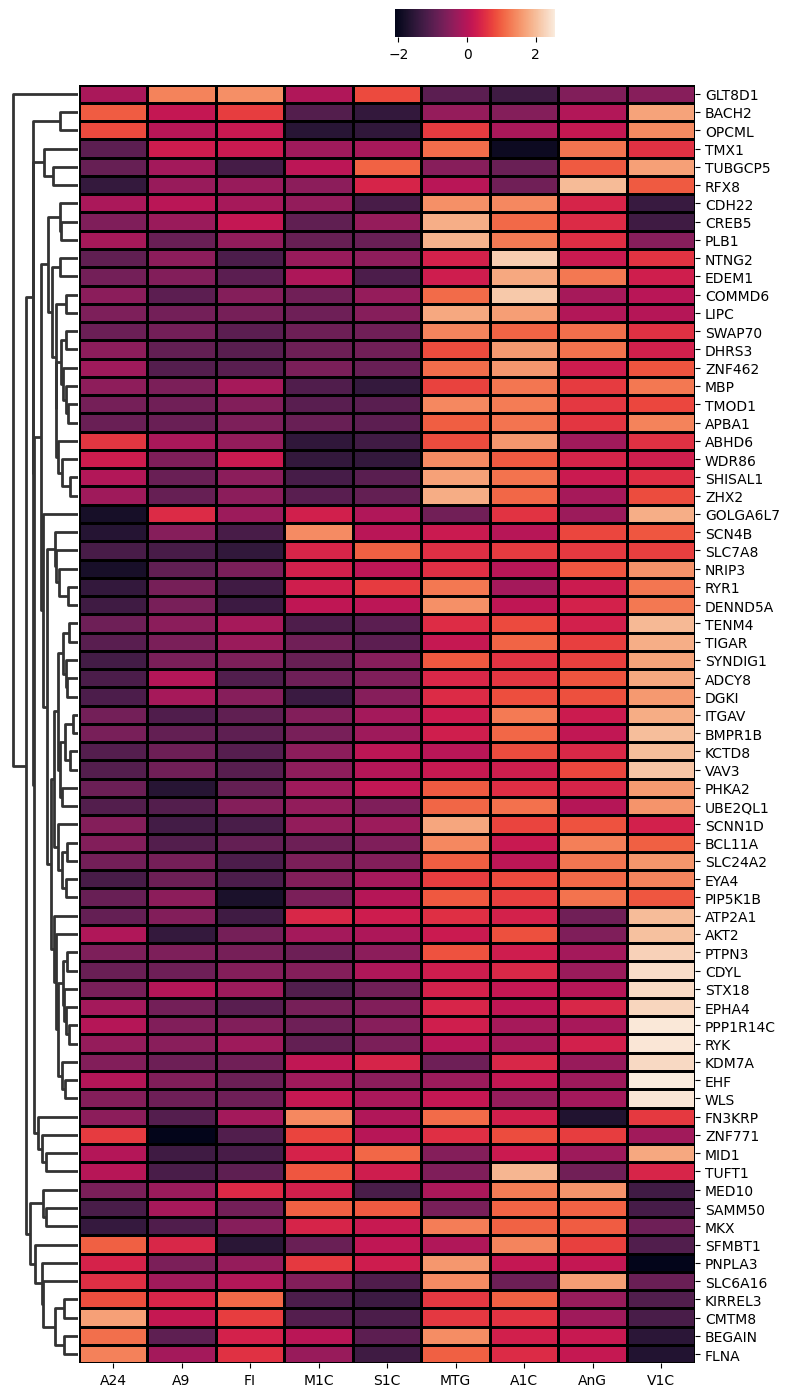

In [24]:
plot_target_genes(
    "BCL11A_direct_+/+_(70g)", regulon_direct_table, 14,
    "L5_ET_BCL11A_direct_activator_target_RNA.png"
)

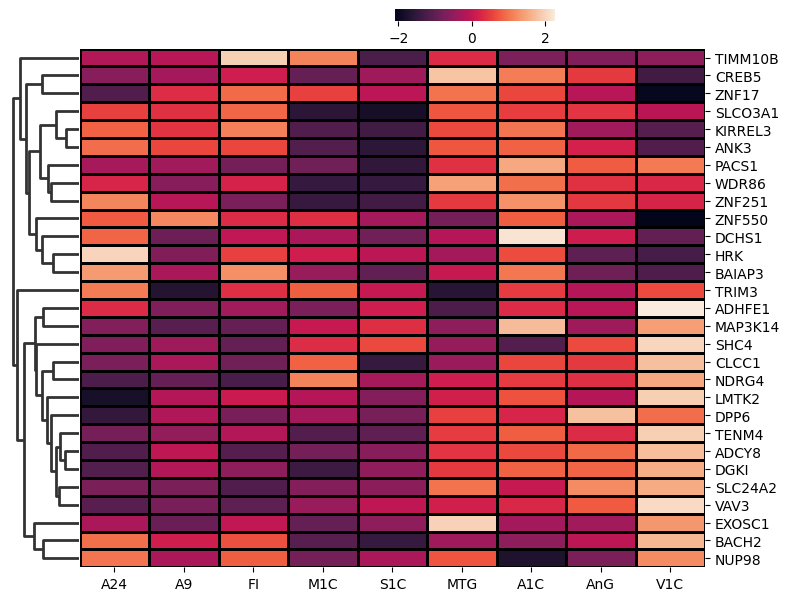

In [25]:
plot_target_genes(
    "BACH2_direct_+/+_(29g)", regulon_direct_table, 6,
    "L5_ET_BACH2_direct_activator_target_RNA.png"
)

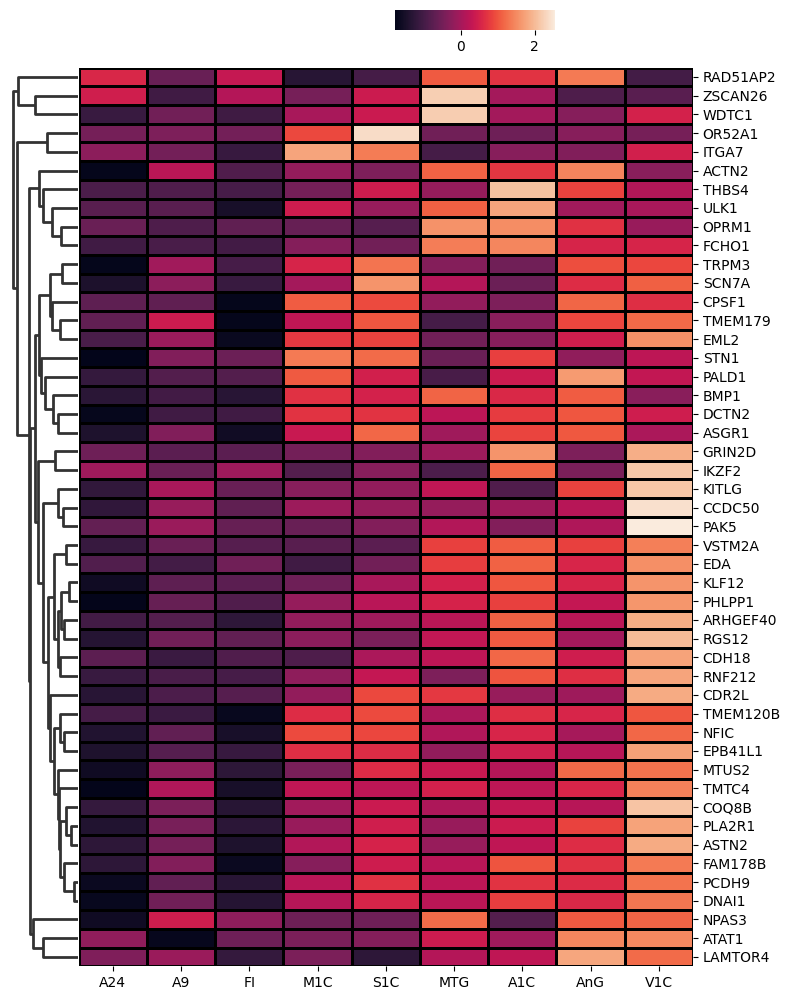

In [26]:
plot_target_genes(
    "KLF12_extended_+/-_(48g)", regulon_extended_table, 10,
    "L5_ET_KLF12_extended_activator_target_RNA.png"
)

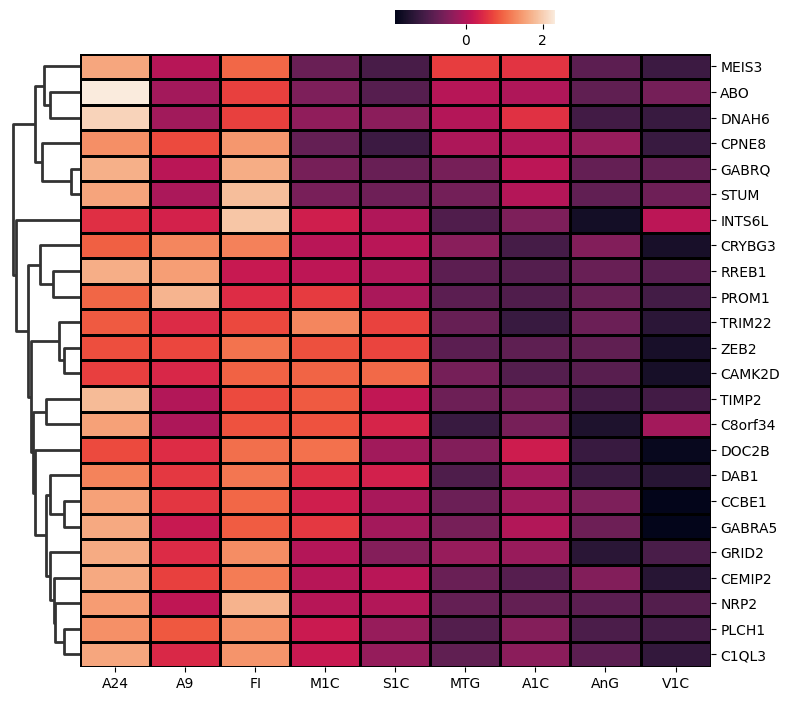

In [27]:
plot_target_genes(
    "KLF12_direct_-/+_(24g)", regulon_direct_table, 7,
    "L5_ET_KLF12_direct_repressor_target_RNA.png"
)

In [33]:
regulon = "BCL11A_direct_+/+_(70g)"
curr_table = regulon_direct_table.loc[regulon_direct_table["Gene_signature_name"] == regulon, :]
curr_table["Gene"].drop_duplicates().to_csv(
    "regulon_interest/BCL11A_direct.tsv", sep="\t", header=False, index=False)

In [34]:
regulon = "BACH2_direct_+/+_(29g)"
curr_table = regulon_direct_table.loc[regulon_direct_table["Gene_signature_name"] == regulon, :]
curr_table["Gene"].drop_duplicates().to_csv(
    "regulon_interest/BACH2_direct.tsv", sep="\t", header=False, index=False)

In [35]:
regulon = "KLF12_extended_+/-_(48g)"
curr_table = regulon_extended_table.loc[regulon_extended_table["Gene_signature_name"] == regulon, :]
curr_table["Gene"].drop_duplicates().to_csv(
    "regulon_interest/KLF12_extended.tsv", sep="\t", header=False, index=False)